In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# loading Akita predictions for model 0 test set
preds = np.load("/project/fudenber_735/akitaX1_analyses_data/cell_type_specificity/test_mouse_fold0_AkitaV2/combined_pred_matrices.npy", allow_pickle=True)

In [3]:
# loading target maps for model 0 test set
targets = np.load("/project/fudenber_735/akitaX1_analyses_data/cell_type_specificity/test_mouse_fold0_AkitaV2/combined_target_matrices.npy", allow_pickle=True)

In [4]:
reduced_preds = preds[..., 1:3]
reduced_targets = targets[..., 1:3]

In [5]:
del preds
del targets

In [6]:
preds_flat = reduced_preds.reshape(725, -1, 2)
targets_flat = reduced_targets.reshape(725, -1, 2)

In [7]:
# Mask NaNs in both matrices by creating boolean masks
preds_mask = np.isnan(preds_flat)
targets_mask = np.isnan(targets_flat)

# Combine the masks: True where either preds or targets have NaN values
combined_mask = np.logical_or(preds_mask, targets_mask)

In [8]:
# Initialize lists to store the results
correlations = []
diff_correlations = []

# Calculate absolute differences and correlations for each map pair for both preds and targets
for i in range(725):
    
    # Mask the NaNs from both preds and targets for cell type 0
    valid_pred_ct1 = preds_flat[i, :, 0][~combined_mask[i, :, 0]]
    valid_target_ct1 = targets_flat[i, :, 0][~combined_mask[i, :, 0]]
    
    # Mask the NaNs from both preds and targets for cell type 1
    valid_pred_ct2 = preds_flat[i, :, 1][~combined_mask[i, :, 1]]
    valid_target_ct2 = targets_flat[i, :, 1][~combined_mask[i, :, 1]]
    
    # Calculate Pearson correlation for cell type 0
    if valid_pred_ct1.size > 1 and valid_target_ct1.size > 1:
        corr_ct1, _ = pearsonr(valid_pred_ct1, valid_target_ct1)
    else:
        corr_ct1 = np.nan  # If there's not enough data to compute correlation, assign NaN
    
    # Calculate Pearson correlation for cell type 1
    if valid_pred_ct2.size > 1 and valid_target_ct2.size > 1:
        corr_ct2, _ = pearsonr(valid_pred_ct2, valid_target_ct2)
    else:
        corr_ct2 = np.nan  # If there's not enough data to compute correlation, assign NaN

    # If both correlations are valid, calculate their mean
    if not np.isnan(corr_ct1) and not np.isnan(corr_ct2):
        avg_corr = np.mean([corr_ct1, corr_ct2])
    else:
        avg_corr = np.nan  # If either correlation is invalid, assign NaN
    
    # Append the average correlation (or NaN) to the list
    correlations.append(avg_corr)
    
    # # Calculate absolute differences for preds (cell types 0 and 1)
    # abs_diff_0_preds = np.abs(valid_pred_ct1 - valid_pred_ct2)
    
    # # Calculate absolute differences for targets (cell types 0 and 1)
    # abs_diff_0_targets = np.abs(valid_target_ct1 - valid_target_ct2)
    
    # Calculate absolute differences for preds (cell types 0 and 1)
    abs_diff_0_preds = valid_pred_ct1 - valid_pred_ct2
    
    # Calculate absolute differences for targets (cell types 0 and 1)
    abs_diff_0_targets = valid_target_ct1 - valid_target_ct2
    
    diff_pearson, _ = pearsonr(abs_diff_0_preds, abs_diff_0_targets)
    diff_correlations.append(diff_pearson)


In [9]:
correlations = np.array(correlations)
diff_correlations = np.array(diff_correlations)

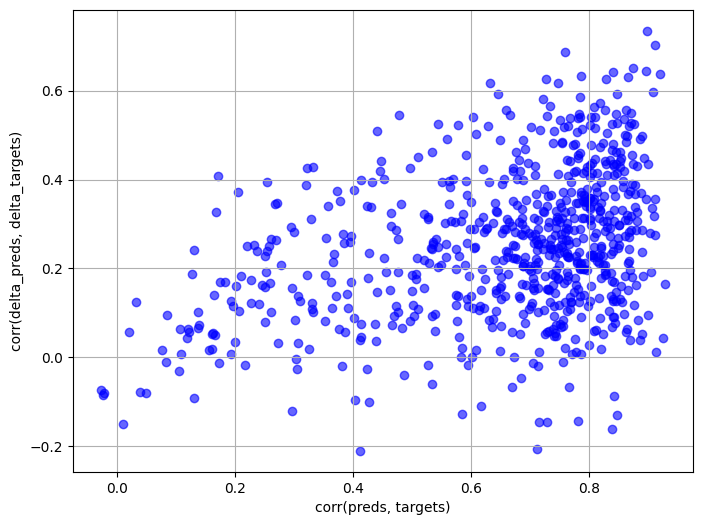

In [24]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(correlations, diff_correlations, alpha=0.6, color='blue')

# Add text annotations for each dot
# for idx, (x, y) in enumerate(zip(correlations, diff_correlations)):
#     plt.text(x, y, str(idx), fontsize=8, ha='right', va='bottom')

# Add labels and grid
plt.xlabel('corr(preds, targets)')
plt.ylabel('corr(delta_preds, delta_targets)')
plt.grid(True)

# plt.savefig('./mESC_CN_plots/mESC_NC_correlations_plot.pdf', format='pdf')

# Show the plot
plt.show()

### Plotting example maps

In [21]:
index = 708

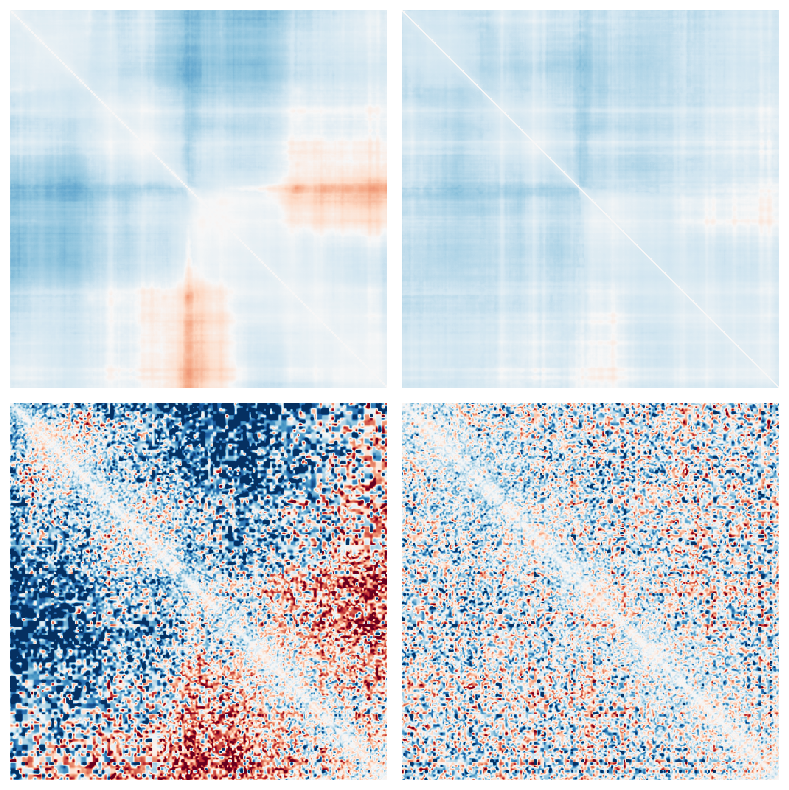

In [23]:
# Create a figure and 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Plot predictions in the first row
sns.heatmap(
    reduced_preds[index, :, :, 0],
    vmin=-0.6, vmax=0.6, cbar=False, cmap="RdBu_r", square=True,
    xticklabels=False, yticklabels=False, ax=axes[0, 0]
)

sns.heatmap(
    reduced_preds[index, :, :, 1],
    vmin=-0.6, vmax=0.6, cbar=False, cmap="RdBu_r", square=True,
    xticklabels=False, yticklabels=False, ax=axes[0, 1]
)

# Plot targets in the second row
sns.heatmap(
    reduced_targets[index, :, :, 0],
    vmin=-0.6, vmax=0.6, cbar=False, cmap="RdBu_r", square=True,
    xticklabels=False, yticklabels=False, ax=axes[1, 0]
)

sns.heatmap(
    reduced_targets[index, :, :, 1],
    vmin=-0.6, vmax=0.6, cbar=False, cmap="RdBu_r", square=True,
    xticklabels=False, yticklabels=False, ax=axes[1, 1]
)

# Adjust layout
plt.tight_layout()

# plt.savefig(f'./mESC_CN_plots/dot_{index}.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()